## Data Viz for events_data source 

In [0]:
# Data Visualization Notebook for Events Data

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.dbutils import DBUtils

# Initialize Spark session
spark = SparkSession.builder.appName("EventsDataVisualization").getOrCreate()
dbutils = DBUtils(spark)
# Set the storage account key in Spark configuration
spark.conf.set(
    "fs.azure.account.key.syphaxstoragedev.dfs.core.windows.net",
    dbutils.secrets.get(scope="adls-scope", key="adls-key")
)
# Define paths
env = "naruto"
source = "events_data"
silver_path = f"abfss://data@syphaxstoragedev.dfs.core.windows.net/{env}/silver/{source}/"
gold_path = f"abfss://data@syphaxstoragedev.dfs.core.windows.net/{env}/gold/{source}/"
quarantine_path = f"abfss://data@syphaxstoragedev.dfs.core.windows.net/{env}/quarantine/{source}/"

# Function to read data from a given path
def read_data(path):
    return spark.read.format("delta").load(path)

# Read data from each path
silver_df = read_data(silver_path)
gold_df = read_data(gold_path)
try:
    quarantine_df = read_data(quarantine_path)
except:
    print("the path does not exist because all the data are valid")

In [0]:
silver_df.show()

+-------+--------------------+----------------+--------------------+--------------------+--------+---------+-------------------+-------------------+--------+------------------+--------------------+--------------------+-----------------+-----------+-----------+-------------------+---------------+----------+-------------------+--------------------+---------------------+
|eventId|           eventName|       eventType|           venueName|             address|latitude|longitude|          startTime|            endTime|duration|expectedAttendance|       organizerName|      organizerEmail|   organizerPhone|isPaidEvent|ticketPrice|hasDedicatedParking|parkingCapacity|parkingFee|        lastUpdated|  processedTimestamp|startTime_partitioned|
+-------+--------------------+----------------+--------------------+--------------------+--------+---------+-------------------+-------------------+--------+------------------+--------------------+--------------------+-----------------+-----------+----------

In [0]:
gold_df.show()

+-------+--------------------+----------------+--------------------+--------------------+--------+---------+-------------------+-------------------+--------+------------------+-----------+-----------+-------------------+---------------+----------+------------------+-------------------+---------------------+
|eventId|           eventName|       eventType|           venueName|             address|latitude|longitude|          startTime|            endTime|duration|expectedAttendance|isPaidEvent|ticketPrice|hasDedicatedParking|parkingCapacity|parkingFee|parkingDemandScore|        lastUpdated|startTime_partitioned|
+-------+--------------------+----------------+--------------------+--------------------+--------+---------+-------------------+-------------------+--------+------------------+-----------+-----------+-------------------+---------------+----------+------------------+-------------------+---------------------+
| BOS001|Boston Freedom Tr...|            Tour|Boston Common Vis...|139 T

In [0]:
quarantine_df.show(truncate=False)

+-------+--------------------+-------------+-----------------------+------------------------------------+--------+---------+-------------------+-------------------+--------+------------------+------------------------------+-----------------------+---------------+-----------+-----------+-------------------+---------------+----------+-------------------+-----------------------+------------------------------------------------------------------------------------------+
|eventId|eventName           |eventType    |venueName              |address                             |latitude|longitude|startTime          |endTime            |duration|expectedAttendance|organizerName                 |organizerEmail         |organizerPhone |isPaidEvent|ticketPrice|hasDedicatedParking|parkingCapacity|parkingFee|lastUpdated        |processedTimestamp     |validation_errors                                                                         |
+-------+--------------------+-------------+----------------

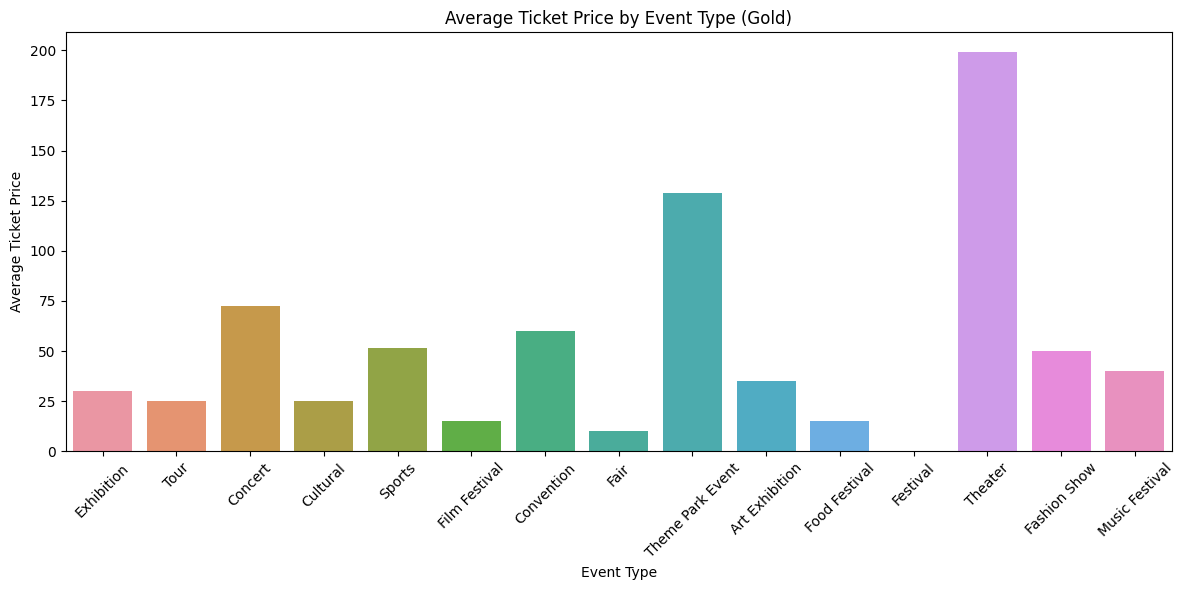

In [0]:
# 5. Visualize average ticket price by event type (Gold)
avg_price_by_type = gold_df.groupBy("eventType").avg("ticketPrice").toPandas()
plt.figure(figsize=(12, 6))
sns.barplot(x="eventType", y="avg(ticketPrice)", data=avg_price_by_type)
plt.title("Average Ticket Price by Event Type (Gold)")
plt.xlabel("Event Type")
plt.ylabel("Average Ticket Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data Viz for parking_data source 

In [0]:
# Data Visualization Notebook for parking Data

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, count, avg
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.dbutils import DBUtils
import pandas as pd

# Initialize Spark session
spark = SparkSession.builder.appName("ParkingDataVisualization").getOrCreate()
dbutils = DBUtils(spark)
# Set the storage account key in Spark configuration
spark.conf.set(
    "fs.azure.account.key.syphaxstoragedev.dfs.core.windows.net",
    dbutils.secrets.get(scope="adls-scope", key="adls-key")
)
# Define paths
env = "naruto"
source = "parking_data"
silver_path = f"abfss://data@syphaxstoragedev.dfs.core.windows.net/{env}/silver/{source}/"
gold_path = f"abfss://data@syphaxstoragedev.dfs.core.windows.net/{env}/gold/{source}/"
quarantine_path = f"abfss://data@syphaxstoragedev.dfs.core.windows.net/{env}/quarantine/{source}/"

# Function to read data from a given path
def read_data(path):
    return spark.read.format("delta").load(path)

# Read data from each path
silver_df = read_data(silver_path)
gold_df = read_data(gold_path)
try:
    quarantine_df = read_data(quarantine_path)
except:
    print("the path does not exist because all the data are valid")

In [0]:
silver_df.show()

+----------+--------------------+--------------------+--------+---------+----------+--------------+-------------------+----------+---------+-----------+--------------------+---------+-------------+-----------------+------------------+-----------------+---------------+--------------------+-------------------+--------------------+-----------------------+
| stationId|                name|             address|latitude|longitude|totalSpots|availableSpots|      occupancyRate|hourlyRate|dailyRate|monthlyRate|      operatingHours|is24Hours|hasEVCharging|hasHandicapAccess|hasSecurityCameras|acceptsCreditCard|          phone|               email|        lastUpdated|  processedTimestamp|lastUpdated_partitioned|
+----------+--------------------+--------------------+--------+---------+----------+--------------+-------------------+----------+---------+-----------+--------------------+---------+-------------+-----------------+------------------+-----------------+---------------+--------------------+-

In [0]:
gold_df.show()

+----------+--------------------+--------------------+--------+---------+----------+--------------+---------------------+----------+---------+-----------+---------+-------------+-----------------+------------------+-----------------+------------+---------------+--------------------+-------------------+-----------------------+
| stationId|                name|             address|latitude|longitude|totalSpots|availableSpots|avgDailyOccupancyRate|hourlyRate|dailyRate|monthlyRate|is24Hours|hasEVCharging|hasHandicapAccess|hasSecurityCameras|acceptsCreditCard|amenityScore|          phone|               email|        lastUpdated|lastUpdated_partitioned|
+----------+--------------------+--------------------+--------+---------+----------+--------------+---------------------+----------+---------+-----------+---------+-------------+-----------------+------------------+-----------------+------------+---------------+--------------------+-------------------+-----------------------+
|   BOST001|Gove

In [0]:
quarantine_df.show(truncate=False)

+---------+--------------------------+-----------------------------------+--------+---------+----------+--------------+------------------+----------+---------+-----------+----------------------------------------------------------------------------------------------------------------+---------+-------------+-----------------+------------------+-----------------+---------------+----------------------+-------------------+-----------------------+----------------------------------------------------------+
|stationId|name                      |address                            |latitude|longitude|totalSpots|availableSpots|occupancyRate     |hourlyRate|dailyRate|monthlyRate|operatingHours                                                                                                  |is24Hours|hasEVCharging|hasHandicapAccess|hasSecurityCameras|acceptsCreditCard|phone          |email                 |lastUpdated        |processedTimestamp     |validation_errors                               

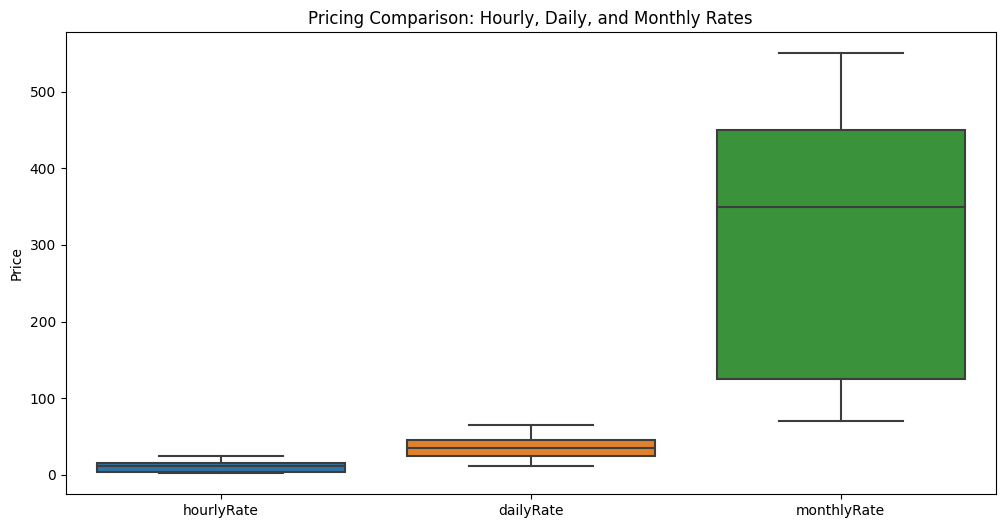

In [0]:
# 5. Pricing Comparison (Gold)
def plot_pricing_comparison():
    pricing_data = gold_df.select('hourlyRate', 'dailyRate', 'monthlyRate').toPandas()
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=pricing_data)
    plt.title('Pricing Comparison: Hourly, Daily, and Monthly Rates')
    plt.ylabel('Price')
    plt.show()

plot_pricing_comparison()

In [0]:
!pip install folium

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# 6. Geographical Distribution of Parking Stations (Gold)
def plot_geographical_distribution():
    geo_data = gold_df.select('latitude', 'longitude', 'name', 'totalSpots').toPandas()
    
    # Calculate the center of the map
    center_lat = geo_data['latitude'].mean()
    center_lon = geo_data['longitude'].mean()
    
    # Create a map
    m = folium.Map(location=[center_lat, center_lon], zoom_start=4.0)
    
    # Add a marker cluster
    marker_cluster = MarkerCluster().add_to(m)
    
    # Add markers for each parking station
    for idx, row in geo_data.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=row['totalSpots'] / 200,  # Adjust this divisor to change marker sizes
            popup=f"Name: {row['name']}<br>Total Spots: {row['totalSpots']}",
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(marker_cluster)
    
    # Display the map in the notebook
    display(m)

plot_geographical_distribution()

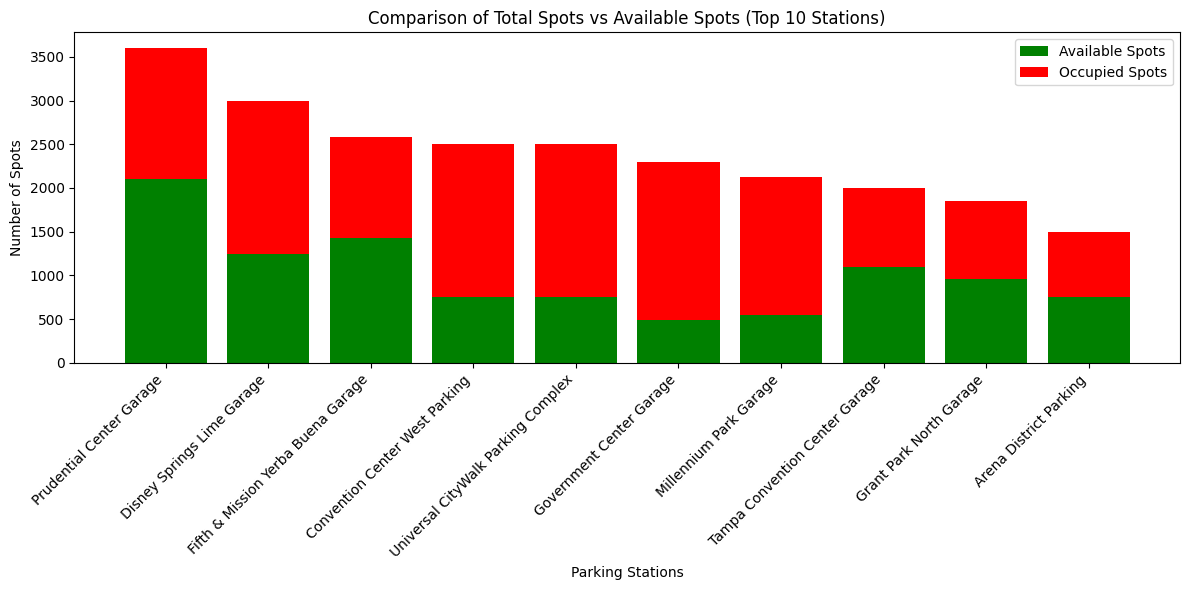

In [0]:
from pyspark.sql.functions import col, count, avg, round

# 7. Comparison of Total Spots vs Available Spots
def plot_spots_comparison():
    spots_data = gold_df.select(
        'name',
        'totalSpots',
        'availableSpots'
    ).toPandas()
    
    # Sort by total spots in descending order
    spots_data = spots_data.sort_values('totalSpots', ascending=False)
    
    # Select top 10 stations by total spots for better visibility
    top_10_stations = spots_data.head(10)
    
    # Create a stacked bar chart
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.bar(top_10_stations['name'], top_10_stations['availableSpots'], label='Available Spots', color='green')
    ax.bar(top_10_stations['name'], top_10_stations['totalSpots'] - top_10_stations['availableSpots'], 
           bottom=top_10_stations['availableSpots'], label='Occupied Spots', color='red')
    
    ax.set_title('Comparison of Total Spots vs Available Spots (Top 10 Stations)')
    ax.set_xlabel('Parking Stations')
    ax.set_ylabel('Number of Spots')
    ax.legend()
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_spots_comparison()

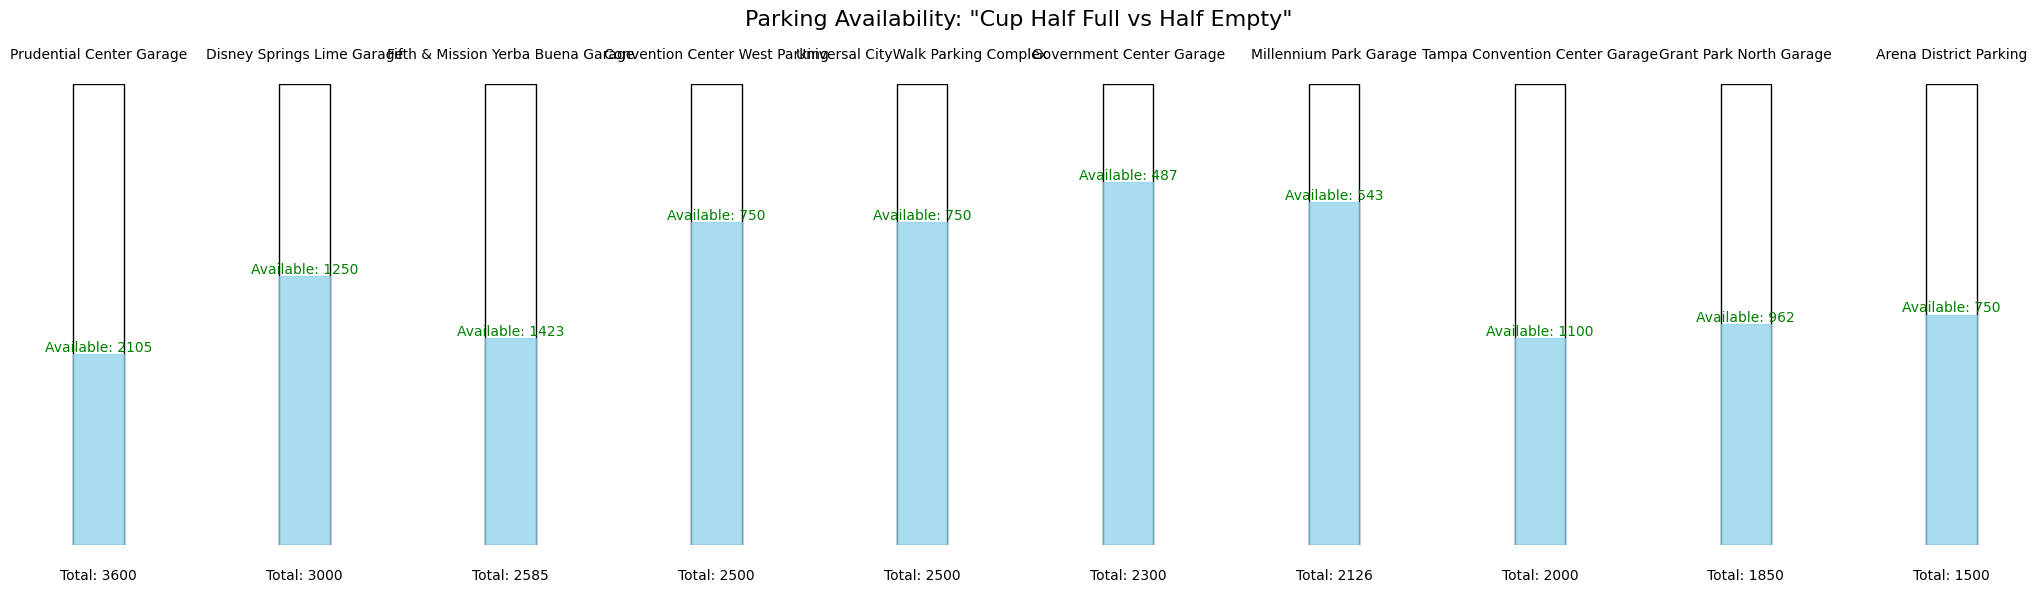

In [0]:
# 7. Comparison of Total Spots vs Available Spots (Cup Visualization)
def plot_spots_comparison_cups():
    spots_data = gold_df.select(
        'name',
        'totalSpots',
        'availableSpots'
    ).toPandas()
    
    # Sort by total spots in descending order and select top 5 stations
    top_5_stations = spots_data.sort_values('totalSpots', ascending=False).head(10)
    
    # Set up the plot
    fig, axs = plt.subplots(1, 10, figsize=(20, 6))
    fig.suptitle('Parking Availability: "Cup Half Full vs Half Empty"', fontsize=16)
    
    def draw_cup(ax, total, available, name):
        # Draw the cup
        cup = plt.Rectangle((0.2, 0), 0.6, 1, fill=False, color='black')
        ax.add_patch(cup)
        
        # Fill the cup
        fill_height = (total - available) / total
        fill = plt.Rectangle((0.2, 0), 0.6, fill_height, fill=True, color='skyblue', alpha=0.7)
        ax.add_patch(fill)
        
        # Add labels
        ax.text(0.5, 1.05, name, ha='center', va='bottom', wrap=True)
        ax.text(0.5, -0.05, f'Total: {total}', ha='center', va='top')
        ax.text(0.5, fill_height, f'Available: {available}', ha='center', va='bottom', color='green')
        
        # Remove axes
        ax.axis('off')
    
    # Draw cups for each station
    for i, (_, row) in enumerate(top_5_stations.iterrows()):
        draw_cup(axs[i], row['totalSpots'], row['availableSpots'], row['name'])
    
    plt.tight_layout()
    plt.show()

plot_spots_comparison_cups()

## Data Viz for smart_city_parking source 

In [0]:
# Data Visualization Notebook for parking Data

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, count, avg
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.dbutils import DBUtils
import pandas as pd

# Initialize Spark session
spark = SparkSession.builder.appName("ParkingDataVisualization").getOrCreate()
dbutils = DBUtils(spark)
# Set the storage account key in Spark configuration
spark.conf.set(
    "fs.azure.account.key.syphaxstoragedev.dfs.core.windows.net",
    dbutils.secrets.get(scope="adls-scope", key="adls-key")
)
# Define paths
env = "naruto"
source = "smart_city_parking"
gold_path = f"abfss://data@syphaxstoragedev.dfs.core.windows.net/{env}/gold/{source}/"

# Function to read data from a given path
def read_data(path):
    return spark.read.format("delta").load(path)

# Read data from each path
gold_df = read_data(gold_path)

In [0]:
importants_columns = ["stationId", "nearby_events", "processedTimestamp", "totalSpots", "availableSpots", "avgDailyOccupancyRate"]
gold_df.select(importants_columns).show(truncate=False)

+----------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------+----------+--------------+---------------------+
|stationId |nearby_events                                                                                                                                                                                                                                                                                                

In [0]:
gold_df.columns

['stationId',
 'name',
 'address',
 'latitude',
 'longitude',
 'totalSpots',
 'availableSpots',
 'avgDailyOccupancyRate',
 'hourlyRate',
 'dailyRate',
 'monthlyRate',
 'is24Hours',
 'hasEVCharging',
 'hasHandicapAccess',
 'hasSecurityCameras',
 'acceptsCreditCard',
 'amenityScore',
 'phone',
 'email',
 'lastUpdated',
 'lastUpdated_partitioned',
 'nearby_events',
 'processedTimestamp']

In [0]:
!pip install folium

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, count, avg, expr
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 10. Nearby Events Impact
from pyspark.sql.functions import explode, size, when

def plot_nearby_events_impact():
    # Explode the nearby_events array and select relevant columns
    events_df = gold_df.select("stationId", "totalSpots", "availableSpots", "avgDailyOccupancyRate", 
                               explode("nearby_events").alias("event"))
    
    # Extract relevant information from the event struct
    events_df = events_df.select("stationId", "totalSpots", "availableSpots", "avgDailyOccupancyRate",
                                 "event.eventName", "event.eventType", "event.startTime", "event.endTime")
    
    # Calculate event duration in hours
    events_df = events_df.withColumn("eventDurationHours", 
                                     (col("endTime").cast("long") - col("startTime").cast("long")) / 3600)
    
    # Calculate occupancy rate for each event
    events_df = events_df.withColumn("eventOccupancyRate", 
                                     1 - (col("availableSpots") / col("totalSpots")))
    
    # Convert to Pandas for visualization
    pdf = events_df.toPandas()
    
    # Create the scatter plot
    fig = px.scatter(pdf, x="eventDurationHours", y="eventOccupancyRate", 
                     size="totalSpots", color="eventType",
                     hover_data=["stationId", "eventName", "startTime", "endTime"],
                     labels={
                         "eventDurationHours": "Event Duration (Hours)",
                         "eventOccupancyRate": "Occupancy Rate During Event",
                         "totalSpots": "Total Parking Spots"
                     },
                     title="Impact of Nearby Events on Parking Occupancy")
    
    fig.update_layout(xaxis_title="Event Duration (Hours)",
                      yaxis_title="Occupancy Rate During Event")
    
    return fig

events_impact = plot_nearby_events_impact()
events_impact.show()

In [0]:
# 11. Event Type Distribution
def plot_event_type_distribution():
    events_df = gold_df.select(explode("nearby_events.eventType").alias("eventType"))
    event_counts = events_df.groupBy("eventType").count().toPandas()
    
    fig = px.pie(event_counts, values='count', names='eventType', 
                 title='Distribution of Nearby Event Types')
    return fig

event_type_dist = plot_event_type_distribution()
event_type_dist.show()

In [0]:
# 12. Events Timeline
def plot_events_timeline():
    events_df = gold_df.select("stationId", explode("nearby_events").alias("event"))
    events_df = events_df.select("stationId", "event.eventName", "event.startTime", "event.endTime")
    pdf = events_df.toPandas()
    
    fig = px.timeline(pdf, x_start="startTime", x_end="endTime", y="stationId", color="eventName",
                      title="Timeline of Nearby Events")
    fig.update_yaxes(categoryorder="total ascending")
    return fig

events_timeline = plot_events_timeline()
events_timeline.show()

In [0]:
# 1. Weather Impact on Parking Occupancy
def plot_weather_impact_on_occupancy():
    events_df = gold_df.select("stationId", "totalSpots", "availableSpots", explode("nearby_events").alias("event"))
    events_df = events_df.select("stationId", "totalSpots", "availableSpots", 
                                 "event.eventName", "event.startTime", "event.t_2m", "event.precip_1h")
    
    events_df = events_df.withColumn("occupancy_rate", 1 - (col("availableSpots") / col("totalSpots")))
    
    pdf = events_df.toPandas()
    
    fig = px.scatter(pdf, x="t_2m", y="occupancy_rate", 
                     size="precip_1h", color="eventName",
                     hover_data=["stationId", "startTime"],
                     labels={
                         "t_2m": "Temperature (°C)",
                         "occupancy_rate": "Occupancy Rate",
                         "precip_1h": "Precipitation (mm)"
                     },
                     title="Weather Impact on Parking Occupancy")
    
    return fig

weather_impact = plot_weather_impact_on_occupancy()
weather_impact.show()

In [0]:
from pyspark.sql.functions import explode, col, to_timestamp, hour

# 6. UV Index and Occupancy Rate by Event Type
def plot_uv_occupancy_by_event_type():
    # Explode the nearby_events array and select relevant columns
    events_df = gold_df.select("stationId", "totalSpots", "availableSpots", explode("nearby_events").alias("event"))
    events_df = events_df.select("stationId", "totalSpots", "availableSpots", 
                                 "event.eventType", "event.uv")
    
    # Calculate occupancy rate
    events_df = events_df.withColumn("occupancy_rate", 1 - (col("availableSpots") / col("totalSpots")))
    
    # Convert to Pandas for visualization
    pdf = events_df.toPandas()
    
    # Create the box plot
    fig = px.box(pdf, x="eventType", y="occupancy_rate", color="eventType",
                 facet_col="uv", facet_col_wrap=3,
                 labels={
                     "eventType": "Event Type",
                     "occupancy_rate": "Occupancy Rate",
                     "uv": "UV Index"
                 },
                 title="Occupancy Rate by Event Type and UV Index")
    
    # Customize the layout
    fig.update_layout(
        xaxis_title="Event Type",
        yaxis_title="Occupancy Rate",
        showlegend=False
    )
    
    # Update facet labels
    for annotation in fig.layout.annotations:
        annotation.text = f"UV Index: {annotation.text.split('=')[1]}"
    
    return fig

uv_occupancy_by_event = plot_uv_occupancy_by_event_type()
uv_occupancy_by_event.show()

In [0]:
# 5. UV Index Impact on Parking Occupancy
def plot_uv_occupancy_relationship():
    # Explode the nearby_events array and select relevant columns
    events_df = gold_df.select("stationId", "totalSpots", "availableSpots", explode("nearby_events").alias("event"))
    events_df = events_df.select("stationId", "totalSpots", "availableSpots", 
                                 "event.eventName", "event.eventType", "event.startTime", "event.uv")
    
    # Calculate occupancy rate
    events_df = events_df.withColumn("occupancy_rate", 1 - (col("availableSpots") / col("totalSpots")))
    
    # Convert to Pandas for visualization
    pdf = events_df.toPandas()
    
    # Create the scatter plot
    fig = px.scatter(pdf, x="uv", y="occupancy_rate", 
                     color="eventType", size="totalSpots",
                     hover_data=["stationId", "eventName", "startTime"],
                     labels={
                         "uv": "UV Index",
                         "occupancy_rate": "Occupancy Rate",
                         "eventType": "Event Type",
                         "totalSpots": "Total Parking Spots"
                     },
                     title="UV Index Impact on Parking Occupancy")
    
    # Add a trend line
    fig.add_traces(px.scatter(pdf, x="uv", y="occupancy_rate", trendline="ols").data)
    
    # Customize the layout
    fig.update_layout(
        xaxis_title="UV Index",
        yaxis_title="Occupancy Rate",
        legend_title="Event Type"
    )
    
    return fig

uv_occupancy_impact = plot_uv_occupancy_relationship()
uv_occupancy_impact.show()